### ```WordCloud```

```WordCloud``` is a ```Python``` module that can be used to create word clouds from plain text files. The documentation can be found [right here](https://amueller.github.io/word_cloud/index.html).

This notebook has two separate but complementary goals, namely:

1. To introduce the basic functionalities of the ```WordCloud``` module by means of simple examples;
2. To develop a short and self-contained cell which can be used on arbitrary text files.

### Basic Functionalities

#### $1$-Clouds

A cloud spanned from a single word.

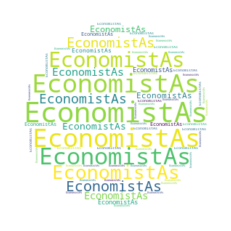

In [1]:
import matplotlib.pyplot as plt

from numpy import ogrid
from wordcloud import WordCloud

text = 'EconomistAs'

x, y = ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2

mask = 255 * mask.astype(int)

wc = WordCloud(background_color='white', repeat=True, mask=mask)

wc.generate(text)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

wc.to_file('1-cloud.png') #Exports the image.

#### $n$-clouds

A cloud spanned from a finite sequence of $n \geq 1$ words. We use dummy text (*Lorem Ipsum*) as a basis for the word cloud.

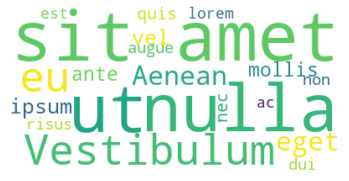

In [2]:
from wordcloud import STOPWORDS

text = open('lipsum.txt').read()

#Words to be filtered out before processing:

stopwords = set(STOPWORDS)

stopwords.add('sed')

wc = WordCloud(background_color='white',
               max_words=20,
               max_font_size=150,
               stopwords=stopwords).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Relative Frequency Clouds

The clouds we have worked with have not yet taken relative frequency of words into account. But one can easily make sure that word size is not randomly assigned:

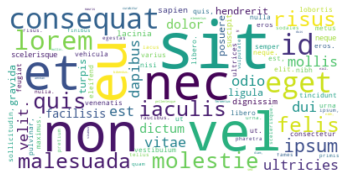

In [3]:
import multidict
import re

def getFrequencyDictForText(sentence):
    
    """
    Returns a dict object with relative frequencies; ignores prepositions by default.
    
    Parameters:
    
    sentence: plain text.
    
    """
    
    fullTermsDict = multidict.MultiDict()
    
    tmpDict = {}
    
    #Get rid of prepositions and articles:

    for text in sentence.split(" "):
        
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            
            continue
            
        #And consider only other classes of words:
            
        val = tmpDict.get(text, 0)
        
        tmpDict[text.lower()] = val + 1
        
    for key in tmpDict:
        
        fullTermsDict.add(key, tmpDict[key])
        
    return fullTermsDict

def makeImage(text, max_words=100):
    
    """
    Parses and displays text in wordcloud format.
    
    Parameters:
    
    text: plain text.
    
    Options:
    
    max_words: an int object.
    """
    
    #Parse:
    
    wc = WordCloud(background_color="white", max_words=max_words)
    
    wc.generate_from_frequencies(text)

    #Display:
    
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
text = open('lipsum.txt').read()

makeImage(getFrequencyDictForText(text))

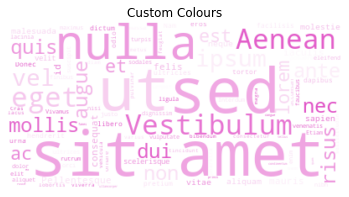

In [4]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    
    return "hsl(311, 70%%, %d%%)" % random.randint(60, 100)

text = open('lipsum.txt').read()

wc = WordCloud(max_words=1000, random_state=1, background_color='white').generate(text)

plt.title("Custom Colours")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()

### Self-Contained Generator (Using Functions Defined Above)

In [5]:
def gen_word_cloud(text):
    
    words = open(text).read()
    
    makeImage(getFrequencyDictForText(text))